In [16]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

In [17]:
def plot_bwimg(image):
    m, n = image.shape
    my_dpi=96
    plt.figure(figsize=(m/my_dpi, n/my_dpi), dpi=my_dpi)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image, cmap=plt.cm.gray, vmin=0, vmax=255)
    

In [18]:
tree_org = plt.imread('strom.bmp')

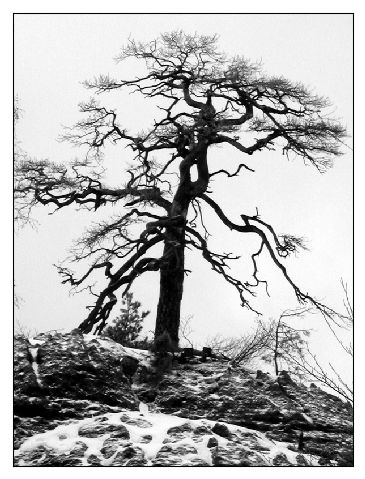

In [19]:
plot_bwimg(tree_org)

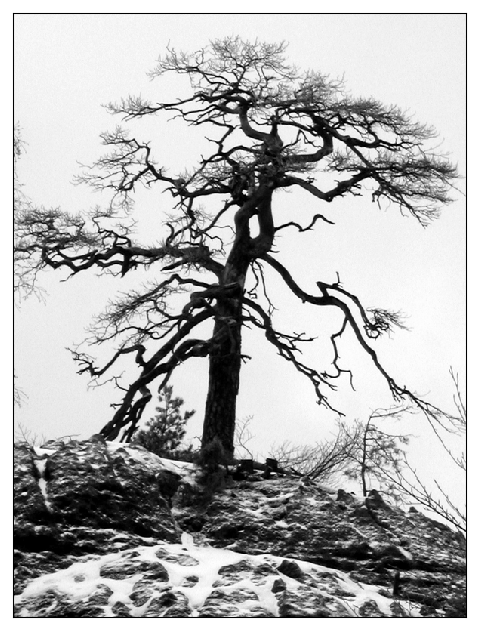

In [28]:

my_dpi=96
plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
plt.xticks([])
plt.yticks([])
plt.imshow(tree_org, cmap=plt.cm.gray, vmin=0, vmax=255)

In [5]:
tree_org.shape

(800, 600)

In [6]:
%%time
U, s, Vh = la.svd(tree_org)

CPU times: user 403 ms, sys: 35.5 ms, total: 438 ms
Wall time: 284 ms


In [7]:
s.shape

(600,)

In [26]:
%%time
k = 200
tree_cmp = U[:,:k-1] @ np.diag(s[:k-1]) @ Vh[:k-1,:]

CPU times: user 17.4 ms, sys: 6.46 ms, total: 23.9 ms
Wall time: 12.2 ms


In [20]:
%%time
#trochu jinou a pomalejší metodou, výsledek stejnej
tree_cmp = np.zeros(tree_org.shape)
for i in range(k):
    tree_cmp = tree_cmp + s[i]*np.outer(U[:,i],Vh[i,:])

CPU times: user 629 ms, sys: 112 ms, total: 741 ms
Wall time: 760 ms


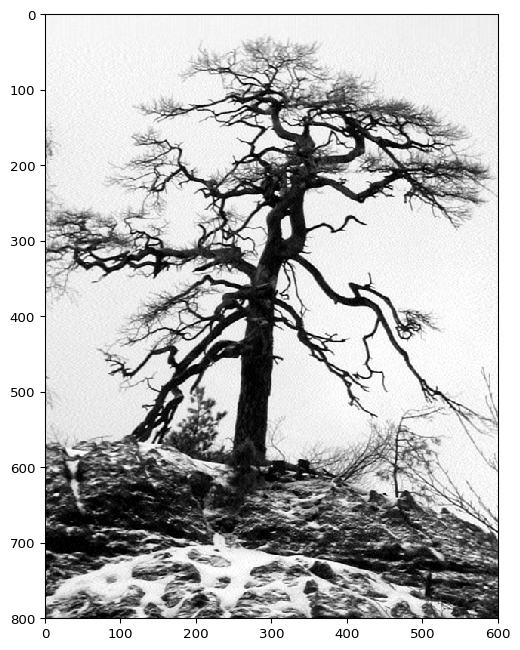

In [27]:
my_dpi=96
plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
plt.imshow(tree_cmp, cmap=plt.cm.gray, vmin=0, vmax=255)

In [15]:
tree_cmp.shape

(800, 600)

In [35]:
plt.imsave('strom_cmp.jpg', tree_cmp, cmap=plt.cm.gray, vmin=0, vmax=255)